# ECE 657 ASSIGNMENT 2: Problem 3
## NLP (Classification of IMDB Movie Reviews)

Jubilee Imhanzenobe: 20809735  
Olohireme Ajayi: 20869827  
Harnoor Singh: 20870613

In [1]:
# import required packages
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np
from utils import *

In [2]:
# Importing the training and testing datasets
# extract data if it hasnt already been extracted and saved as csv
if not os.path.isfile("train_data_NLP.csv"):
    X_train, y_train = load_data()
    train_data = pd.DataFrame([X_train, y_train]).transpose()
    train_data.columns = ["Review", "Rating"]

    X_test, y_test = load_data(False)
    test_data = pd.DataFrame([X_test, y_test]).transpose()
    test_data.columns = ["Review", "Rating"]

    # saving the datasets as csv files for ease of loading
    train_data.to_csv("train_data_NLP.csv", index_col = False)
    test_data.to_csv("test_data_NLP.csv", index_col = False)

In [3]:
# loading the dataset from saved file
train_data = pd.read_csv("train_data_NLP.csv")

### Data Preprocessing

We first preprocess the reviews and tokenize them to make them ready for our NLP embedding techniques.

During preprocessing, all special characters were removed and each review wwas tokenized i.e separated into a list containing then individual words.
Next, the words were stemmed using potterstemmer to reduce every word to its root word. Finally, the tokenized words were joined back together to get a preprocessed review.

In [4]:
""" Data Preprocessing """
# preprocessing the reviews in the training data
train_data['Token'] = train_data['Review'].apply(preprocess_sentence)

In [5]:
# Before preprocessing
train_data['Review'][0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [6]:
# After preprocessing
train_data['Token'][0]

'bromwel high cartoon comedi ran time program school life teacher year teach profess lead believ bromwel high satir much closer realiti teacher scrambl surviv financi insight student see right pathet teacher pomp petti whole situat remind school knew student saw episod student repeatedli tri burn school immedi recal high classic line inspector im sack one teacher student welcom bromwel high expect mani adult age think bromwel high far fetch piti isnt'

### Model 1 (Using Count Vectorizer)

Count Vectorizer is an embedding method for textual data it is also called Term Frequency Embedding. It transforms a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. It creates a sparse matrix with each unique word being represented by a column in the matrix and teh value of each element is the frequency of the particular word in the text sample.  

A 5000 feature vectorization was chosen so that is large enough to properly represent the large sized corpus yet small enough for good running efficiency.

A 5 layer ANN (1 input, 3 hidden, 1 output) was used in the classification of the embedded movie reviews. Due to the large input dimensions, dropout layers were added between hidden layers to prevent overfitting of the network to the training set.

In [7]:
# creating the word embedding using count vectorizer
X, CV = word_vectorizer(train_data.Token, "CountVectorizer", 10000)
y = train_data.Rating

# splittint the data into training and validatuion set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=0)

In [8]:
""" Building the ANN model """
model = Sequential()

# Input - Layer
model.add(Dense(128, activation = "relu", input_shape=(X_train.shape[1], )))

# Hidden - Layers
model.add(Dropout(0.3, seed=None))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.2, seed=None))
model.add(Dense(16, activation = "relu"))

# Output- Layer
model.add(Dense(1, activation = "sigmoid"))
model.summary()

#Compiling the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280128   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,284,801
Trainable params: 1,284,801
Non-trainable params: 0
______________________________________________

In [9]:
history = model.fit(X_train,y_train,
                    epochs = 40,
                    validation_data = (X_val, y_val),
                    verbose = 1, # print result every epoch
                    batch_size = 128)

Epoch 1/40
176/176 [==============================] - 3s 17ms/step - loss: 0.3938 - accuracy: 0.8352 - val_loss: 0.2992 - val_accuracy: 0.8760
Epoch 2/40
176/176 [==============================] - 3s 15ms/step - loss: 0.2075 - accuracy: 0.9213 - val_loss: 0.3207 - val_accuracy: 0.8784
Epoch 3/40
176/176 [==============================] - 3s 16ms/step - loss: 0.1161 - accuracy: 0.9582 - val_loss: 0.3715 - val_accuracy: 0.8748
Epoch 4/40
176/176 [==============================] - 3s 16ms/step - loss: 0.0594 - accuracy: 0.9808 - val_loss: 0.4829 - val_accuracy: 0.8732
Epoch 5/40
176/176 [==============================] - 3s 16ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.5791 - val_accuracy: 0.8720
Epoch 6/40
176/176 [==============================] - 3s 16ms/step - loss: 0.0241 - accuracy: 0.9921 - val_loss: 0.6417 - val_accuracy: 0.8692
Epoch 7/40
176/176 [==============================] - 3s 16ms/step - loss: 0.0246 - accuracy: 0.9923 - val_loss: 0.7196 - val_accuracy: 0.8640

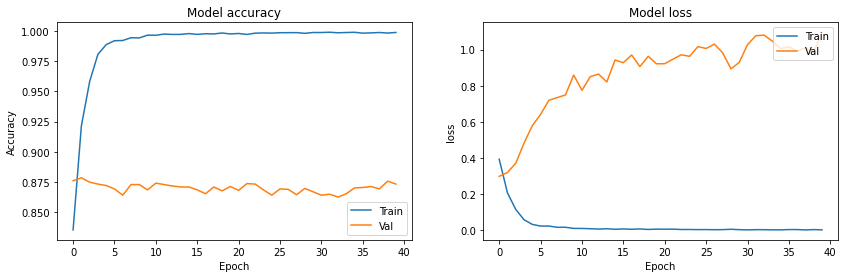

In [10]:
accuracy_loss_plot(history)

In [11]:
print_final_result(history)


 ******************** Training set Evaluation ********************
Final Train accuracy:  0.9989
Final Train loss:  0.0033

 ******************** Validation set Evaluation ********************
Final Val accuracy:  0.8732
Final Val loss:  1.0957


### Model 2 (Using TF-IDF Vectorizer)

Term Frequency-Inverse Document Frequency Vectorizer (TF-IDF) is similar to Count Vectorizer in that it embeds words based on the frequency of a word in the corpus but it also provides a numerical representation of the importance of the words. The term frequency (TF) refers to the count of a word in a sentence and the document frequency (DF) refers to the number of documents in the corpus that contain the particular word.

A 5000 feature vectorization was chosen so that is large enough to properly represent the large sized corpus yet small enough for good running efficiency.

A 5 layer ANN (1 input, 3 hidden, 1 output) was used in the classification of the embedded movie reviews. Due to the large input dimensions, dropout layers were added between hidden layers to prevent overfitting of the network to the training set.

In [12]:
# creating the word embedding using count vectorizer
X2, TFIDF = word_vectorizer(train_data.Token, "TFIDF", 10000)

# splittint the data into training and validatuion set
X_train2, X_val2, y_train2, y_val2 = train_test_split(X2, y, test_size=0.10, random_state=0)

In [13]:
""" Building the ANN model """
model2 = Sequential()

# Input - Layer
model2.add(Dense(128, activation = "relu", input_shape=(X_train2.shape[1], )))

# Hidden - Layers
model2.add(Dropout(0.3, seed=None))
model2.add(Dense(32, activation = "relu"))
model2.add(Dropout(0.2, seed=None))
model2.add(Dense(16, activation = "relu"))

# Output- Layer
model2.add(Dense(1, activation = "sigmoid"))
model2.summary()

#Compiling the ANN
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               1280128   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,284,801
Trainable params: 1,284,801
Non-trainable params: 0
____________________________________________

In [14]:
history2 = model2.fit(X_train2,y_train2,
                    epochs = 40,
                    validation_data = (X_val2, y_val2),
                    verbose = 1, # print result every epoch
                    batch_size = 128)

Epoch 1/40
176/176 [==============================] - 3s 16ms/step - loss: 0.3910 - accuracy: 0.8343 - val_loss: 0.2754 - val_accuracy: 0.8880
Epoch 2/40
176/176 [==============================] - 2s 13ms/step - loss: 0.1911 - accuracy: 0.9298 - val_loss: 0.2952 - val_accuracy: 0.8820
Epoch 3/40
176/176 [==============================] - 2s 14ms/step - loss: 0.1221 - accuracy: 0.9593 - val_loss: 0.3407 - val_accuracy: 0.8772
Epoch 4/40
176/176 [==============================] - 2s 14ms/step - loss: 0.0686 - accuracy: 0.9793 - val_loss: 0.4212 - val_accuracy: 0.8768
Epoch 5/40
176/176 [==============================] - 2s 13ms/step - loss: 0.0338 - accuracy: 0.9899 - val_loss: 0.5066 - val_accuracy: 0.8772
Epoch 6/40
176/176 [==============================] - 2s 13ms/step - loss: 0.0165 - accuracy: 0.9952 - val_loss: 0.6169 - val_accuracy: 0.8720
Epoch 7/40
176/176 [==============================] - 2s 13ms/step - loss: 0.0078 - accuracy: 0.9980 - val_loss: 0.6927 - val_accuracy: 0.8748

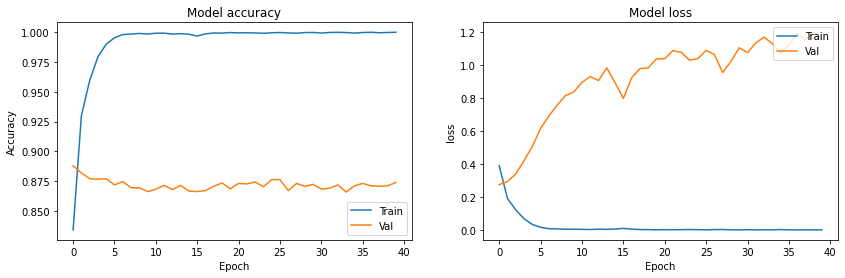

In [15]:
accuracy_loss_plot(history2)

In [16]:
print_final_result(history2)


 ******************** Training set Evaluation ********************
Final Train accuracy:  0.9999
Final Train loss:  0.001

 ******************** Validation set Evaluation ********************
Final Val accuracy:  0.874
Final Val loss:  1.161


### Model 3 (Using Word2Vec)

Word2Vec unlike the previously used vectorizers actually embeds the meaning of a word by inferring it from its context. It uses a linguistic technique which uses the context in which a word appears to infer its meaning. Word2Vec only gets the embeddings of words and is usually very good for finding relationships between words but it doesnt embed sentences. 

Here, we got the sentence embeddings by averaging the embedding of every word in the sentence or review.

For Word2Vec, the the reviews were preprocessed slightly differently. Like before, all special characters were removed and each review wwas tokenized i.e separated into a list containing then individual words. Finally, the words were Lemmatized to reduce every word to its root word.

In [17]:
sentences = train_data["Review"].apply(w2v_preprocess)
w2v_model = Word2Vec(sentences=sentences, 
                     vector_size=100, 
                     window=5, 
                     min_count=5, 
                     workers=8)

In [18]:
w2v_model.wv.most_similar('review', topn=10)

[('comment', 0.9135243892669678),
 ('imdb', 0.8200966715812683),
 ('reviewers', 0.795735239982605),
 ('summary', 0.7686901092529297),
 ('user', 0.761417806148529),
 ('reviewer', 0.7340171933174133),
 ('post', 0.722459614276886),
 ('website', 0.7096920609474182),
 ('critics', 0.6957697868347168),
 ('negative', 0.6920081377029419)]

The cell above shows the ability of Word2Vec to find similarity between words

In [19]:
df_train = get_sentence_embedding(sentences, w2v_model)
X3 = df_train.iloc[:].values

In [20]:
# splitting the data into training and validatuion set
X_train3, X_val3, y_train3, y_val3 = train_test_split(X3, y, test_size=0.10, random_state=0)

In [21]:
""" Building the ANN model """
model3 = Sequential()

# Input - Layer
model3.add(Dense(128, activation = "relu", input_shape=(X_train3.shape[1], )))

# Hidden - Layers
model3.add(Dropout(0.3, seed=None))
model3.add(Dense(32, activation = "relu"))
model3.add(Dropout(0.2, seed=None))
model3.add(Dense(16, activation = "relu"))

# Output- Layer
model3.add(Dense(1, activation = "sigmoid"))
model3.summary()

#Compiling the ANN
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               12928     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
__________________________________________________

In [22]:
history3 = model3.fit(X_train3,y_train3,
                    epochs=40,
                    validation_data=(X_val3, y_val3),
                    verbose=1, # print result every epoch
                    batch_size=128)

Epoch 1/40
176/176 [==============================] - 1s 3ms/step - loss: 0.5222 - accuracy: 0.7469 - val_loss: 0.4507 - val_accuracy: 0.7924
Epoch 2/40
176/176 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7958 - val_loss: 0.4371 - val_accuracy: 0.7976
Epoch 3/40
176/176 [==============================] - 0s 3ms/step - loss: 0.4353 - accuracy: 0.8011 - val_loss: 0.4358 - val_accuracy: 0.7988
Epoch 4/40
176/176 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8060 - val_loss: 0.4329 - val_accuracy: 0.8016
Epoch 5/40
176/176 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8098 - val_loss: 0.4328 - val_accuracy: 0.7972
Epoch 6/40
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.8117 - val_loss: 0.4275 - val_accuracy: 0.8080
Epoch 7/40
176/176 [==============================] - 0s 2ms/step - loss: 0.4134 - accuracy: 0.8136 - val_loss: 0.4239 - val_accuracy: 0.8108
Epoch 

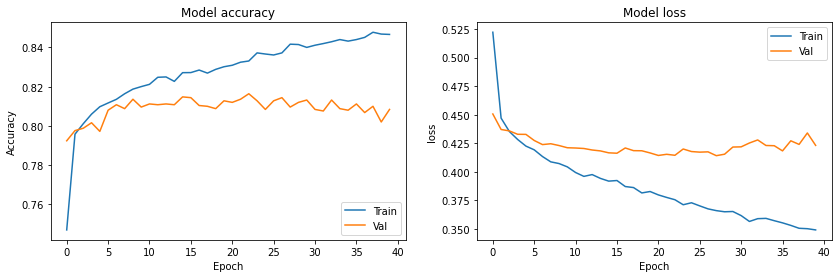

In [23]:
accuracy_loss_plot(history3)

In [24]:
print_final_result(history3)


 ******************** Training set Evaluation ********************
Final Train accuracy:  0.8467
Final Train loss:  0.3492

 ******************** Validation set Evaluation ********************
Final Val accuracy:  0.8084
Final Val loss:  0.4232


### Model 4 (Using Doc2Vec)

Unlike Word2Vec that trains on a single word, Doc2Vec trains on texts of variable length and with Doc2Vec, relationships between sentences or documents can be measured. Doc2Vec is a generalization of the Word2Vec method

In [25]:
""" Using Doc2Vec """
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(sentences)]

d2v_model = Doc2Vec(tagged_data, vector_size = 100, window = 5, min_count = 5, epochs = 20, workers=8)
embed = sentences.apply(d2v_model.infer_vector)

X4 = np.stack( embed, axis=0)

In [26]:
# splitting the data into training and validatuion set
X_train4, X_val4, y_train4, y_val4 = train_test_split(X4, y, test_size=0.10, random_state=0)

In [27]:
model4 = Sequential()

# Input - Layer
model4.add(Dense(128, activation = "relu", input_shape=(X_train4.shape[1], )))

# Hidden - Layers
model4.add(Dropout(0.3, seed=None))
model4.add(Dense(32, activation = "relu"))
model4.add(Dropout(0.2, seed=None))
model4.add(Dense(16, activation = "relu"))

# Output- Layer
model4.add(Dense(1, activation = "sigmoid"))
model4.summary()

#Compiling the ANN
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               12928     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 17,601
Trainable params: 17,601
Non-trainable params: 0
__________________________________________________

In [28]:
history4 = model4.fit(X_train4,y_train4,
                    epochs=40,
                    validation_data=(X_val4, y_val4),
                    verbose=1, # print result every epoch
                    batch_size=128)

Epoch 1/40
176/176 [==============================] - 1s 4ms/step - loss: 0.4943 - accuracy: 0.7587 - val_loss: 0.4135 - val_accuracy: 0.8148
Epoch 2/40
176/176 [==============================] - 0s 3ms/step - loss: 0.3932 - accuracy: 0.8281 - val_loss: 0.4025 - val_accuracy: 0.8212
Epoch 3/40
176/176 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8352 - val_loss: 0.4005 - val_accuracy: 0.8200
Epoch 4/40
176/176 [==============================] - 0s 3ms/step - loss: 0.3725 - accuracy: 0.8402 - val_loss: 0.3993 - val_accuracy: 0.8180
Epoch 5/40
176/176 [==============================] - 0s 2ms/step - loss: 0.3631 - accuracy: 0.8431 - val_loss: 0.3981 - val_accuracy: 0.8260
Epoch 6/40
176/176 [==============================] - 0s 2ms/step - loss: 0.3553 - accuracy: 0.8484 - val_loss: 0.3942 - val_accuracy: 0.8232
Epoch 7/40
176/176 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8509 - val_loss: 0.3933 - val_accuracy: 0.8284
Epoch 

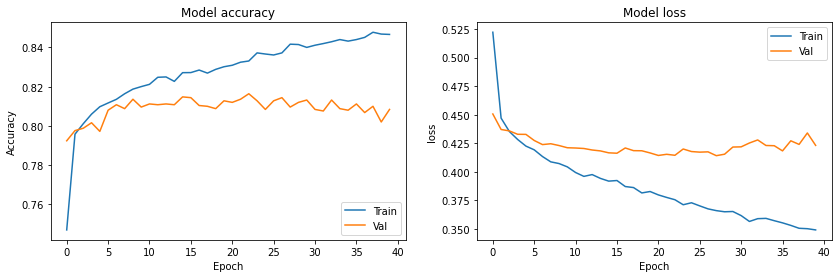

In [29]:
accuracy_loss_plot(history3)

In [30]:
print_final_result(history4)


 ******************** Training set Evaluation ********************
Final Train accuracy:  0.9047
Final Train loss:  0.2277

 ******************** Validation set Evaluation ********************
Final Val accuracy:  0.8228
Final Val loss:  0.4629


### Comparing the performance of the models

In [31]:
history_list = [history, history2, history3, history4]
labels = ["CV", "TFIDF", "Word2Vec", "Doc2Vec"]

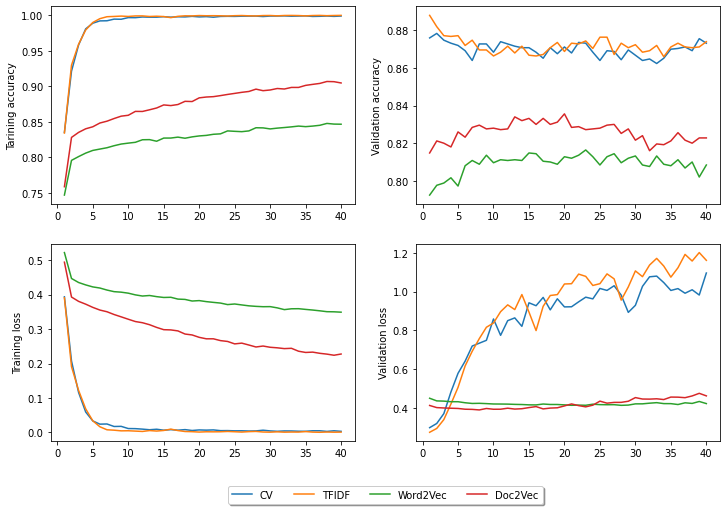

In [32]:
result = compare_models(history_list, labels)

From the plots, it can be seen that Count Vectorizer and TFIDF performed better than Word2Vec and Doc2vec in terms of training accuracy and validation accuracy. Although Count Vectorizer and TFIDF had lower training losses compared to Word2Vec and Doc2Vec, both of them had higher validation losses that Word2Vec and Doc2Vec.

Also, as the number of epoch increased, the training accuracy, training loss and validation accuracy for Count Vectorizer and TFID remained considerably constant but the validation loss for both embedding methods seemed to increase.

In [33]:
result

,Train Accuracy,Train Loss,Val Accuracy,Val Loss
CV,99.89,0.0033,87.32,1.0957
TFIDF,99.99,0.0010,87.40,1.1610
Word2Vec,84.67,0.3492,80.84,0.4232
Doc2Vec,90.47,0.2277,82.28,0.4629


The table above shows the final evaluation of the different embedding methods used after 40 epochs and CV and TFIDF have comparatively similar performances on the training and validation set but TFIDF seemed to perform slightly better and as such will be used for evaluating the test set.

### Evaluating models on the test set

In [34]:
# Loading the test set data
test_data = pd.read_csv("test_data_NLP.csv")

#### Model 1 (Count Vectorizer)

In [35]:
# preprocessing the reviews in the training data
test_data['Token'] = test_data['Review'].apply(preprocess_sentence)

# Vectorizing using Bag of Words Model
X_test = CV.transform(test_data.Token).toarray()
y_test = test_data.Rating

# predicting the test set results
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_pred, y_test)
F_score = f1_score(y_test, y_pred, average = "binary")
CM = confusion_matrix(y_pred, y_test)

print("Test accuracy: ", round(accuracy * 100, 2))
print("Test F_score: ", round(F_score, 4))
print("Test confusion matrix: \n", CM)

Test accuracy:  85.22
Test F_score:  0.8543
Test confusion matrix: 
 [[10470  1665]
 [ 2030 10835]]


#### Model 2 (TFIDF)

In [36]:
# Vectorizing using Bag of Words Model
X_test = TFIDF.transform(test_data.Token).toarray()

# predicting the test set results
y_pred = (model2.predict(X_test) > 0.5).astype("int32")

accuracy2 = accuracy_score(y_pred, y_test)
F_score2 = f1_score(y_test, y_pred, average = "binary")
CM2 = confusion_matrix(y_pred, y_test)

print("Test accuracy: ", round(accuracy2 * 100, 2))
print("Test F_score: ", round(F_score2, 4))
print("Test confusion matrix: \n", CM2)

Test accuracy:  83.67
Test F_score:  0.8326
Test confusion matrix: 
 [[10764  2346]
 [ 1736 10154]]


#### Model 3 (Word2Vec)

In [37]:
# preprocess the reviews
test_sentences = test_data["Review"].apply(w2v_preprocess)

# get Word2Vec embeddings of test data
df_test = get_sentence_embedding(sentences, w2v_model)
X_test = df_test.iloc[:].values

# predicting the test set results
y_pred = (model3.predict(X_test) > 0.5).astype("int32")

accuracy3 = accuracy_score(y_pred, y_test)
F_score3 = f1_score(y_test, y_pred, average = "binary")
CM3 = confusion_matrix(y_pred, y_test)

print("Test accuracy: ", round(accuracy * 100, 2))
print("Test F_score: ", round(F_score, 4))
print("Test confusion matrix: \n", CM)

Test accuracy:  85.22
Test F_score:  0.8543
Test confusion matrix: 
 [[10470  1665]
 [ 2030 10835]]


#### Model 4 (Doc2Vec)

In [38]:
# get Doc2Vec embeddings of test data
test_embed = test_sentences.apply(d2v_model.infer_vector)
X_test = np.stack(test_embed, axis=0)

# predicting the test set results
y_pred = (model4.predict(X_test) > 0.5).astype("int32")

accuracy4 = accuracy_score(y_pred, y_test)
F_score4 = f1_score(y_test, y_pred, average = "binary")
CM4 = confusion_matrix(y_pred, y_test)

print("Test accuracy: ", round(accuracy * 100, 2))
print("Test F_score: ", round(F_score, 4))
print("Test confusion matrix: \n", CM)

Test accuracy:  85.22
Test F_score:  0.8543
Test confusion matrix: 
 [[10470  1665]
 [ 2030 10835]]
